# Titanic Dataset - Exploratory Data Analysis (EDA)

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
#  Step 2: Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

In [3]:
#  Step 3: Basic info
print("🔹 Dataset Shape:", titanic_data.shape)
display(titanic_data.head())

🔹 Dataset Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#  Step 4: Data types and summary
display(titanic_data.dtypes)
display(titanic_data.describe())
display(titanic_data.describe(include='object'))

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


age            177
embarked         2
deck           688
embark_town      2
dtype: int64

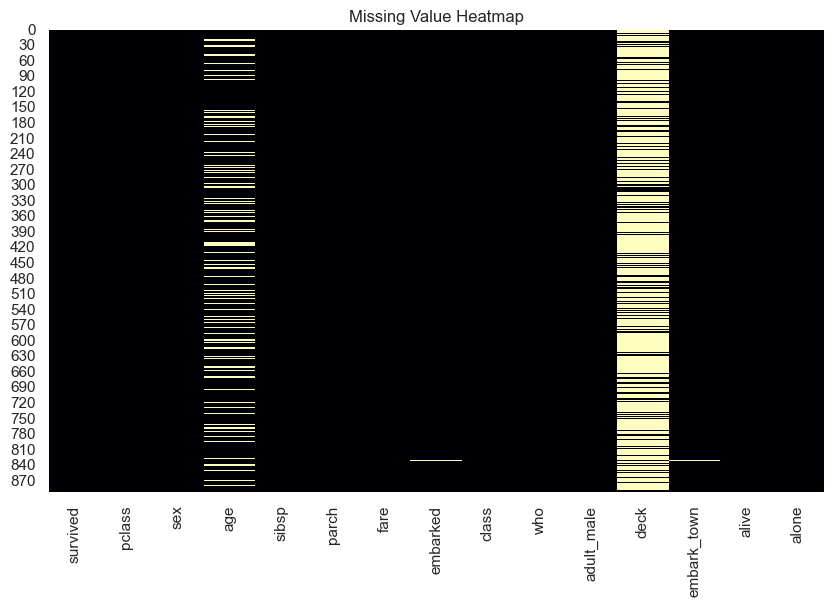

In [5]:
#  Step 5: Missing values
missing = titanic_data.isnull().sum()
display(missing[missing > 0])
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='magma')
plt.title('Missing Value Heatmap')
plt.show()

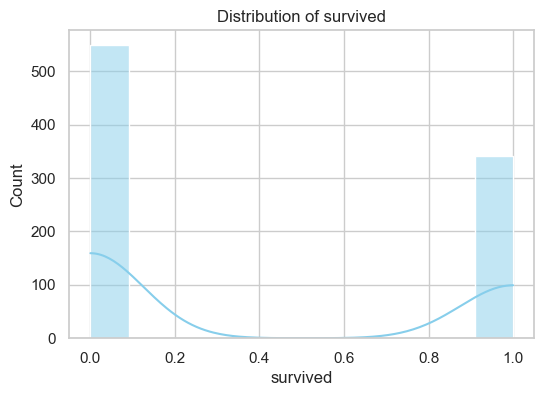

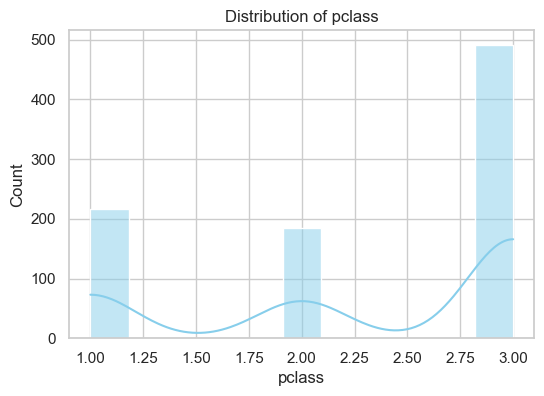

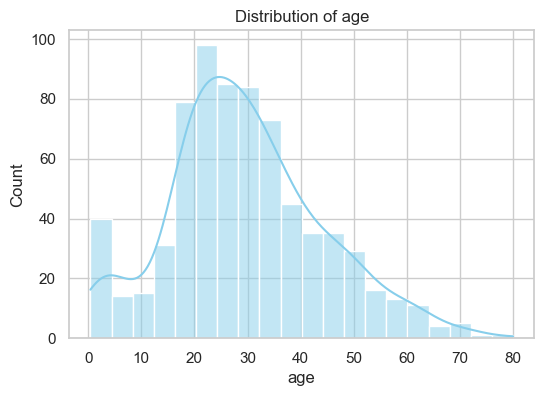

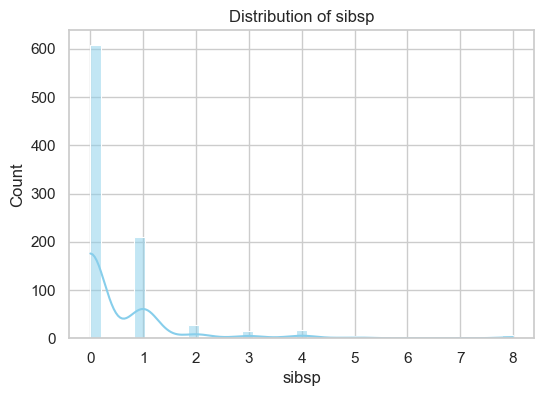

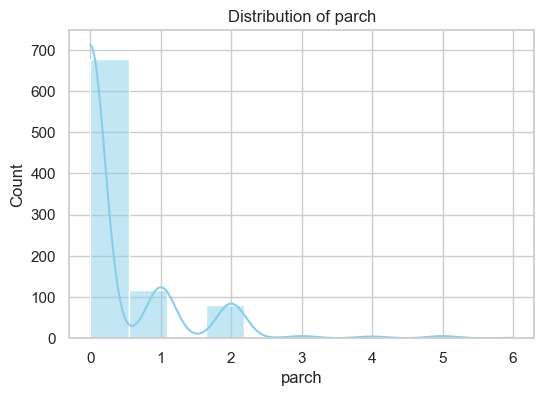

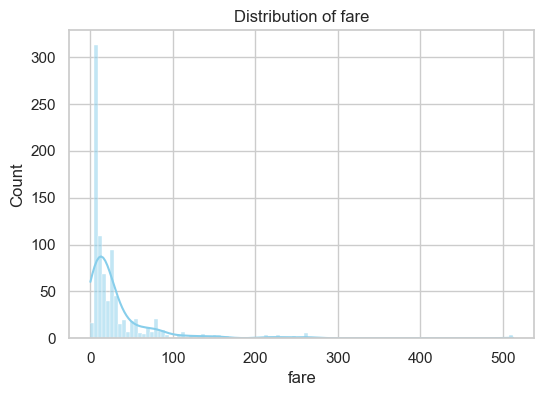

In [6]:
#  Step 6: Distribution of numeric features
numeric_cols = titanic_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(titanic_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

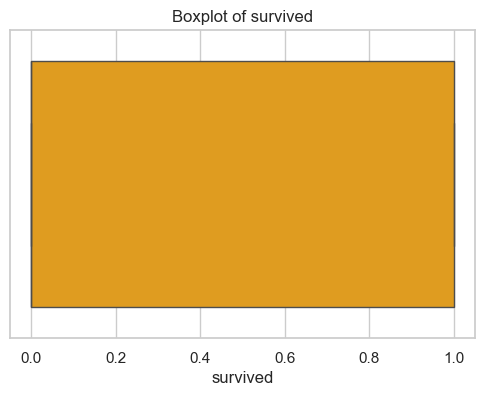

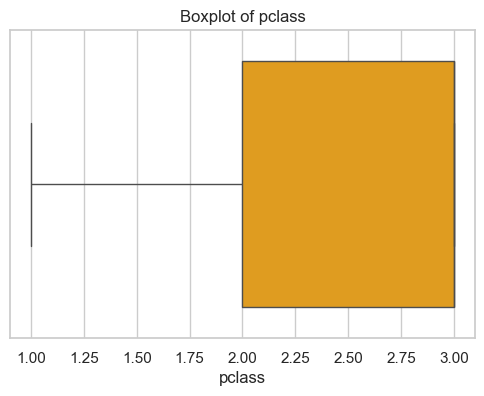

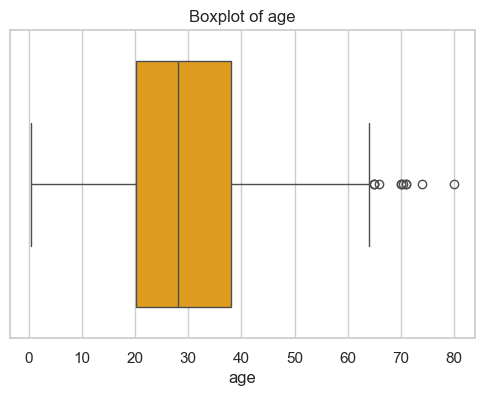

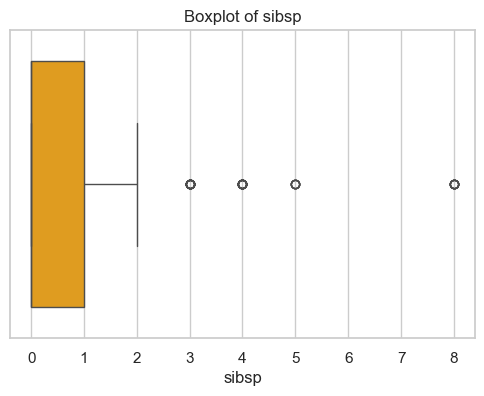

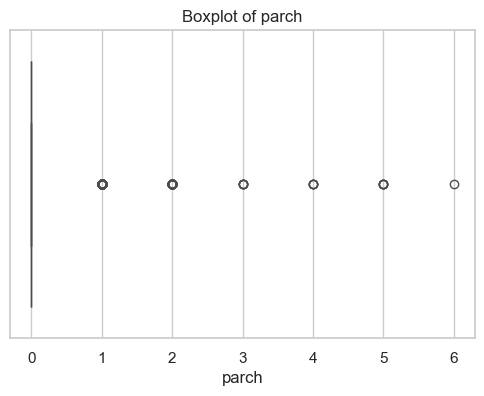

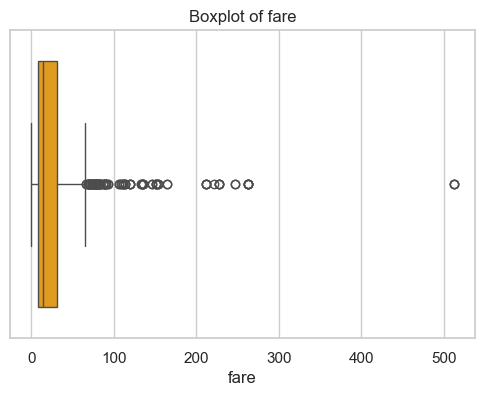

In [16]:
#  Step 7: Outlier detection
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=titanic_data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

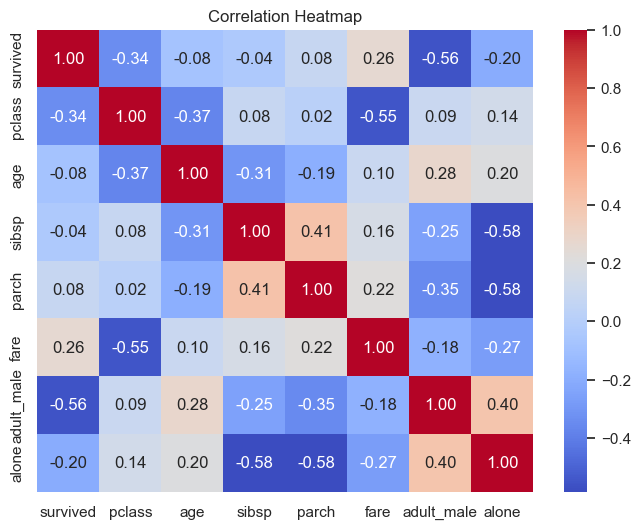

In [8]:
#  Step 8: Correlation heatmap
corr = titanic_data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

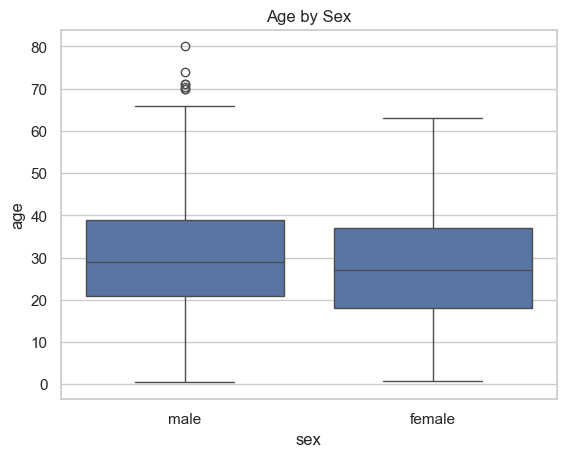

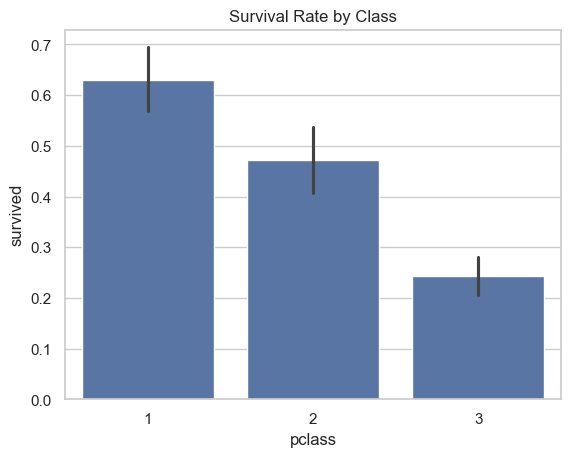

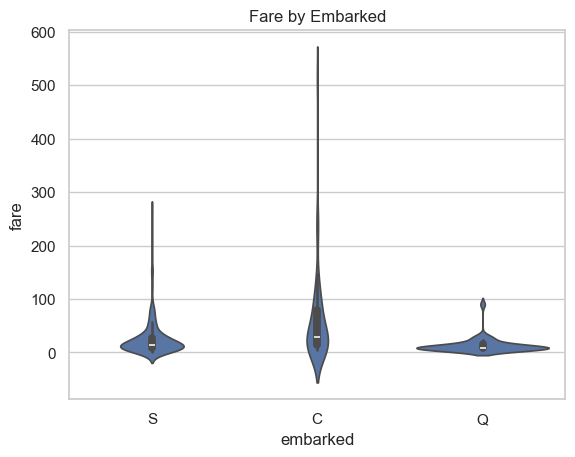

In [9]:
#  Step 9: Relationship - categorical vs numeric
sns.boxplot(x='sex', y='age', data=titanic_data)
plt.title('Age by Sex')
plt.show()
sns.barplot(x='pclass', y='survived', data=titanic_data)
plt.title('Survival Rate by Class')
plt.show()
sns.violinplot(x='embarked', y='fare', data=titanic_data)
plt.title('Fare by Embarked')
plt.show()

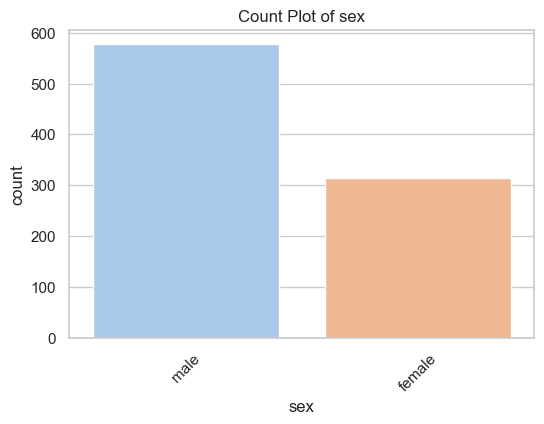

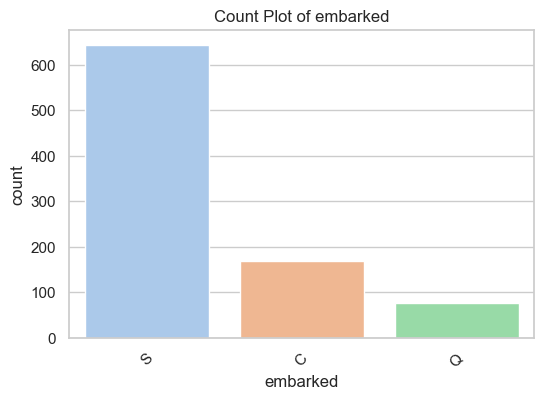

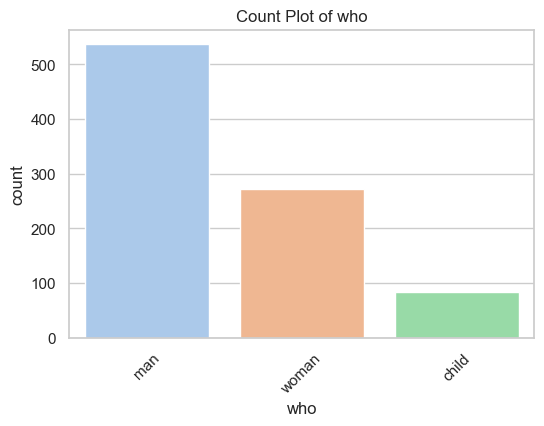

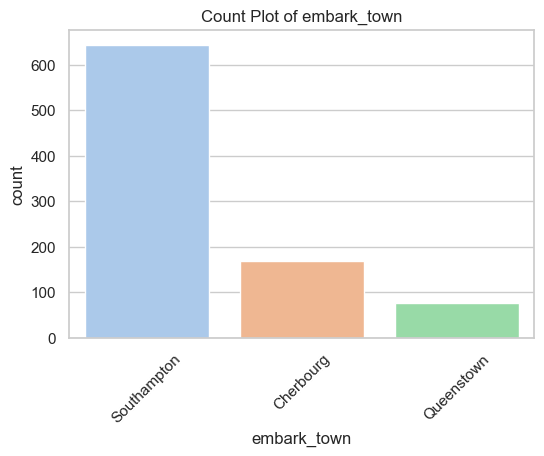

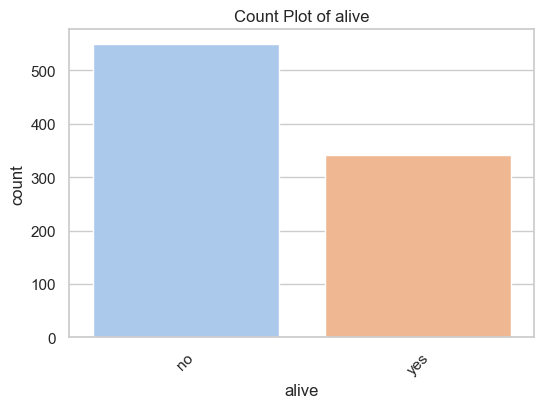

In [17]:
#  Step 10: Countplot - categorical features
categorical_cols = titanic_data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=col, data=titanic_data, palette='pastel', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


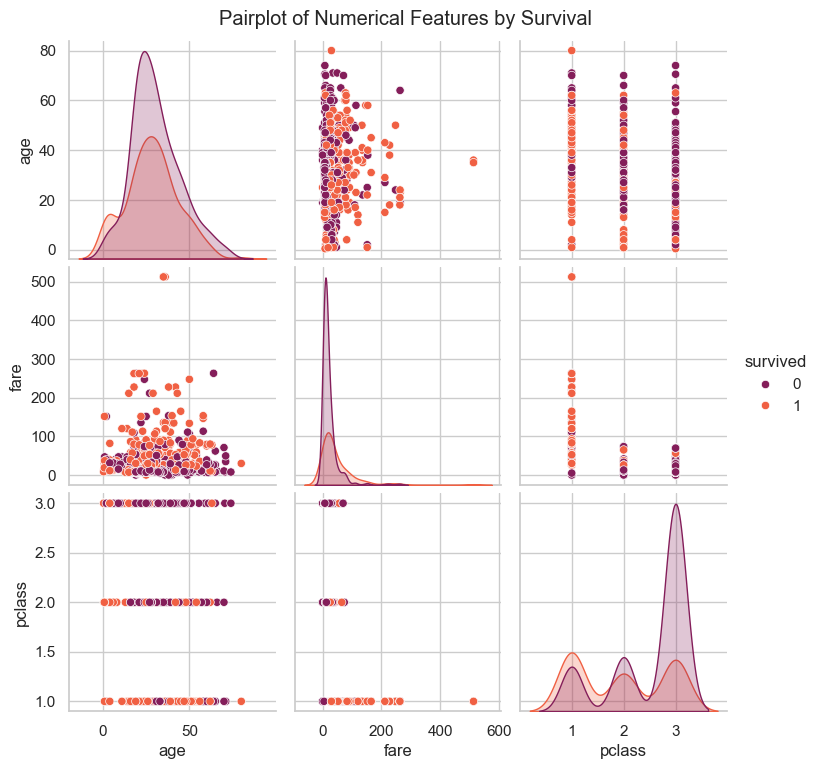

In [18]:
#  Plot 1: Pairplot
sns.pairplot(titanic_data[['age', 'fare', 'pclass', 'survived']], hue='survived', palette='rocket')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

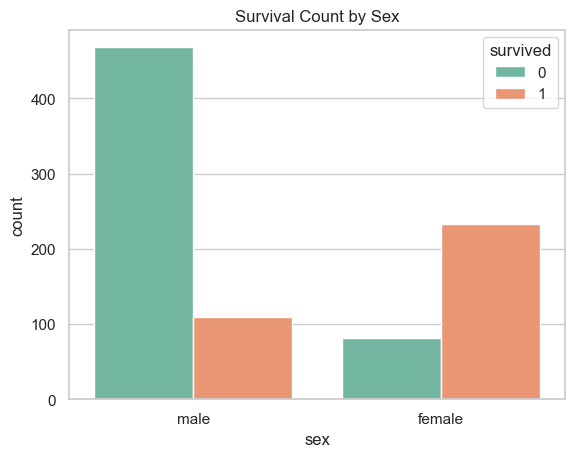

In [12]:
# Plot 2: Countplot with hue
sns.countplot(x='sex', hue='survived', data=titanic_data, palette='Set2')
plt.title('Survival Count by Sex')
plt.show()

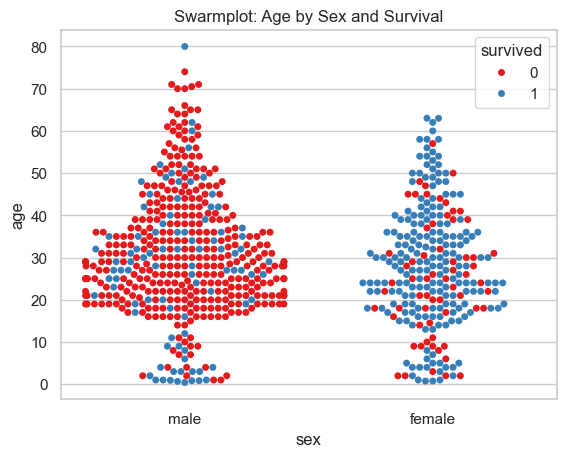

In [13]:
#  Plot 3: Swarmplot
sns.swarmplot(x='sex', y='age', hue='survived', data=titanic_data, palette='Set1')
plt.title('Swarmplot: Age by Sex and Survival')
plt.show()

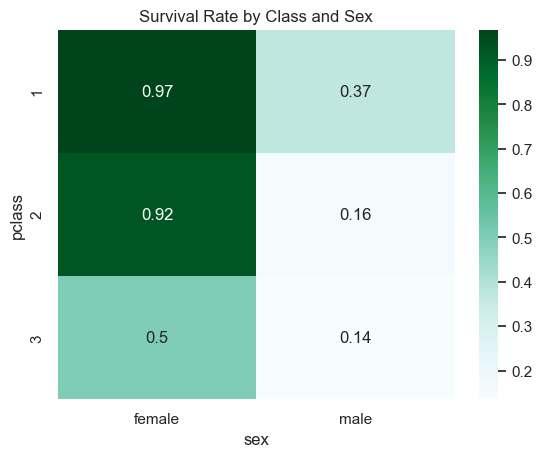

In [14]:
#  Plot 4: Heatmap - Survival rate by class and sex
pivot_table = titanic_data.pivot_table(values='survived', index='pclass', columns='sex')
sns.heatmap(pivot_table, annot=True, cmap='BuGn')
plt.title('Survival Rate by Class and Sex')
plt.show()

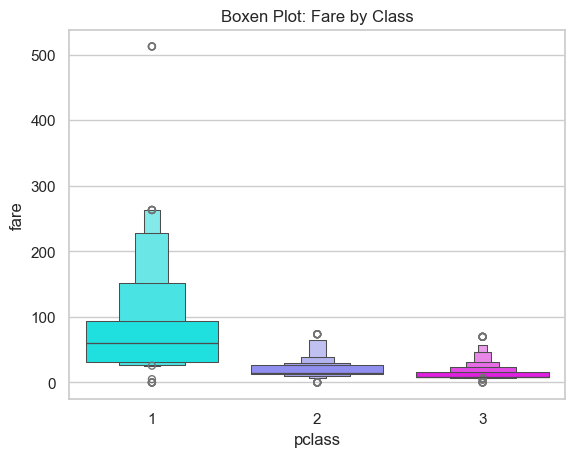

In [19]:
#  Plot 5: Boxen plot
sns.boxenplot(x='pclass', y='fare', hue='pclass', data=titanic_data, palette='cool', legend=False)
plt.title('Boxen Plot: Fare by Class')
plt.show()
